# Árboles de decisión

El objetivo de este notebook es entender con más detalle cómo funciona un árbol de decisión. Para ello, seguiremos trabajando con el dataset de Titanic y luego con el Iris Dataset. El notebook está dividido en cuatro partes. 

1. Construcción de un árbol de decisión *a mano*.
2. Cálculo de Impureza y Ganancia Gini
3. Árboles de Decisión en Scikit-Learn + *train/test split*
4. Iris Dataset.

## 1. Construcción de un árbol de decisión *a mano*

**NOTA**: LEER HASTA EL FINAL ANTES DE MODIFICAR EL CÓDIGO.

En primer lugar, vamos a definir algunas funciones.

1. La función `accuracy`, dada las etiquetas que ustedes predigan y las etiquetas reales, calcula la medida de performance, en este caso, la exactitud. **No la tienen que modificar**.

In [1]:
def accuracy(y_predicted, y_real):
    return sum([y_i == y_j for (y_i, y_j) in zip(y_predicted, y_real)])/len(y_real)

2. La función `predict_instance`, dada una instancia x con sus atributos, predice si sobrevivió o no. **Es la única función que tendrán que modificar**.

In [9]:
def predict_instance(x):
    '''
    Modificar las siguientes líneas de codigo. 
    Este será su algoritmo para predecir si sobrevivirá o no por instancia.
    La variable prediction debe contener la etiqueta 0 o 1 
    
    Algunas opciones son: predecir que nadie sobrevivio, que todos sobrevivieron,
    predecir al azar, y usar lo aprendido cuando exploramos el dataset de Titanic
    '''
    prediction = 0 # cambiar
    
    #### UNA POSIBLE FORMA DE EMPEZAR:
    # if x.Age < 12:
    #     prediction = 1
    # else:
    #     prediction = 0
    ## FIN DE COMPLETAR

    ### Si usamos el genero y la clase
    
    if x.Sex == 'female':
        prediction = 1
    elif x.Pclass == 1:
        prediction = 1
    
    return prediction

3. Por último, la función `predict` toma todo las instancias X y, usando la función que definieron antes, predice para cada una de ellas si sobrevivió o no. **No la tienen que modificar**.

In [11]:
def predict(X):
    y_predicted = []
    for x in X.itertuples(): 
        y_i = predict_instance(x) 
        y_predicted.append(y_i)
    return y_predicted

**Consigna**

* Cargar el dataset de Titanic y separar en una variable `X` los atributos que usaremos para predecir, y en una variable `y` la etiqueta que queremos predecir. En este caso, si sobrevivió o no.

In [12]:
import pandas as pd

df = pd.read_csv("../DataSets/Titanic.csv")
X = df.drop("Survived", axis=1)
y = df.Survived

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* Usar los datos `X` para predecir si los pasajeros sobrevivieron o no.

In [22]:
y_pred = predict(X)

In [23]:
print(y_pred)

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 

* Calcular la medida de performance entre las etiquetas reales `y` y las etiquetas predichas `y_pred`

In [26]:
print("Accuracy final: ", round(accuracy(y_pred, y), 3))

Accuracy final:  0.679


**Ejercicio**: modificar `predict_instance` de forma tal de mejorar el resultado recién obtenido.

**Para pensar:** las performances asociadas a predecir todos `0` (nadie sobrevivió), todos `1` (todos sobrevivieron) y predecir al azar son muy importantes para evaluar nuestro trabajo. ¿Por qué?

## 2. Cálculo de Impureza y Ganancia Gini

Ahora vamos a calcular cuán buena es la *pregunta* del género y clase para separar las muestras usando la impureza Gini. Para ello:

**Ejercicio:** calcular la impureza inicial del dataset. Ayuda: recordar que en la variable `y` ya separaron las etiquetas. Si es un objeto de Pandas, tal vez la función `value_counts()` puede ser útil. 

In [8]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
muestras_neg, muestras_pos = y.value_counts()
N = y.size
gini_inicial = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2

In [10]:
print(gini_inicial)

0.4730129578614428


**Ejercicio:** calcular la impureza Gini luego de separar por el género. Recuerden que tienen que calcular la impureza en dos hojas - una correspondiente a género masculino y otras femenino - y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear una máscara y reciclar código anterior.

In [11]:
mascara = df.Sex == 'female'
y_female = y[mascara]
y_male = y[~mascara]

In [12]:
muestras_neg, muestras_pos = y_female.value_counts()
N = y_female.size
gini_female = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_female)

0.3828350034484158


In [13]:
muestras_neg, muestras_pos = y_male.value_counts()
N = y_male.size
gini_male = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_male)

0.3064437162277842


In [14]:
print('Impureza Gini al separar por Genero:',(y_female.sum()*gini_female + y_male.sum()*gini_male)/y.size)

Impureza Gini al separar por Genero: 0.13760148246050435


**Ejercicio:** calcular la impureza Gini luego de separar por clase. Recuerden que tienen que calcular la impureza en tres hojas y luego hacer un promedio ponderado. Para eso, puede ser conveniente crear tres máscaras y reciclar código anterior.

In [15]:
mascara = df.Pclass == 1
y_1 = y[mascara]

In [16]:
muestras_neg, muestras_pos = y_1.value_counts()
N = y_1.size
gini_1 = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_1)

0.46639231824417005


In [17]:
mascara = df.Pclass == 2
y_2 = y[mascara]

In [18]:
muestras_neg, muestras_pos = y_2.value_counts()
N = y_2.size
gini_2 = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_2)

0.49852315689981097


In [19]:
mascara = df.Pclass == 3
y_3 = y[mascara]

In [20]:
muestras_neg, muestras_pos = y_3.value_counts()
N = y_3.size
gini_3 = 1 - (muestras_neg/N)**2 - (muestras_pos/N)**2
print(gini_3)

0.3672458634234966


In [21]:
print('Impureza Gini al separar por clase:', (y_1.sum()*gini_1 + y_2.sum()*gini_2 + y_3.sum()*gini_3)/y.size)

Impureza Gini al separar por clase: 0.16891484587978312


**¿Cuál tiene una mayor ganancia Gini?¿Concuerda con lo visto hasta ahora?**

**Para pensar:** ¿cómo modificarían el código para calcular la ganancia Gini al separar por edad? Por ejemplo, al separar por mayor de 12 años y menor de 12 años.

## 3. Árboles de Decisión en Scikit-Learn + *train/test split*

Nuevamente, vamos a trabajar con el dataset del Titanic. La consigna consiste en entrenar los mismos modelos de la clase 15 (en el sentido de usar el mismo preprocesamiento y los mismos atributos), pero separando los conjuntos de Train y Test. Además, evaluar los modelos en esos conjuntos. Entonces: reciclar el código del Notebook de la clase anterior y agregar un `train_test_split`, predecir sobre `X_train` y `X_test` y evaluar el desempeño de los modelos sobre esos conjuntos. Dejamos el *esqueleto* de algunas celdas que les pueden servir. 

Una vez que obtengan los desempeños sobre cada set y modelo, modificar el parámetro `max_depth` del `DecisionTreeClassifier` y volver a entrenar y evaluar. Prestar atención a las diferencias de desempeño en cada conjunto. ¿Qué está ocurriendo?

In [22]:
# Importamos el Dataset
df = pd.read_csv('../DataSets/Titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
df.drop(['Cabin','PassengerId','Name','Ticket','Embarked'], axis=1,inplace=True)

In [24]:
df.dropna(inplace = True)

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

### Entrenamiento del Modelo y evaluación


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un objeto arbol
tree = DecisionTreeClassifier()

**Primer Modelo**

In [27]:
X = df[['Pclass','Sex']]
y = df['Survived']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.799163179916318
Accuracy sobre conjunto de Test: 0.7754237288135594


**Segundo Modelo**

In [31]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9937238493723849
Accuracy sobre conjunto de Test: 0.7542372881355932


## 4. Iris Dataset

Entrenar un `DecisionTreeClassifier` sobre el Iris Dataset. Dejamos algunas consignas de guía.

**Ejercicio**: importar los datos, descartar las columnas que no agreguen información y hacer una `pairplot`

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [37]:
iris = pd.read_csv('../DataSets/iris_dataset.csv')
iris = iris.drop("fila", axis=1)
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


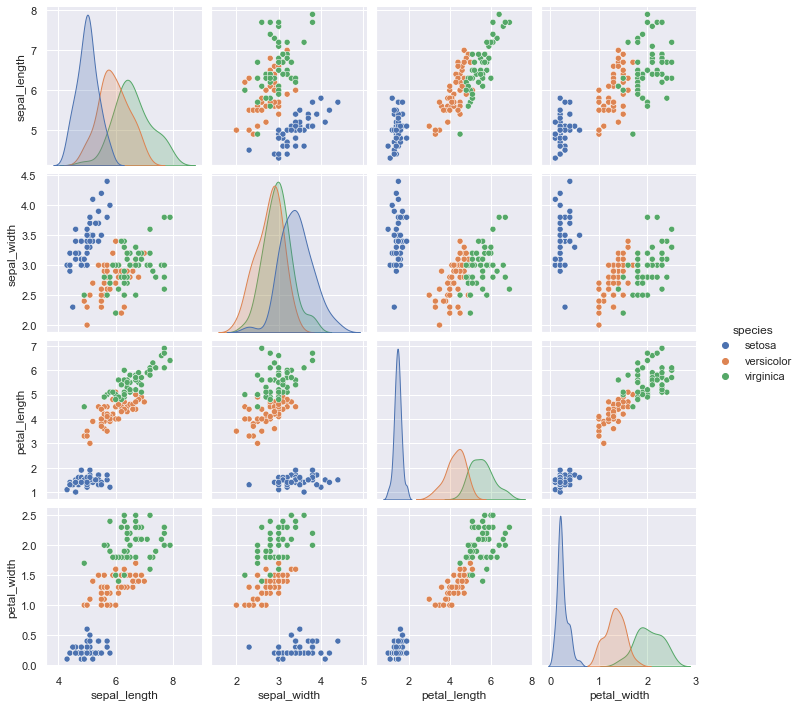

In [38]:
sns.pairplot(iris, hue="species")
plt.show()

**Para pensar**: ¿Son separables las especies?¿Cuáles serán más fáciles de separar?¿Con qué atributos?

**Ejercicio**: separar del dataframe los features y las etiquetas. Llamar `X` a los features e `y` a las etiquetas. Elegir qué features usar (pueden ser todos). Fijarse si es necesario transformar las etiquetas o si Scikit-Learn puede trabajar con ellas.

In [39]:
X = iris.drop("species", axis=1)
y = iris.species

In [40]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

**Ejercicio**: separar en conjuntos de Train y Test

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Ejercicio**: importar un DecisionTreeClassifier de Scikit-Learn

In [43]:
from sklearn.tree import DecisionTreeClassifier

**Ejercicio**: crear un DecisionTreeClassifier con max_depth = 2.

In [44]:
tree = DecisionTreeClassifier(max_depth = 2)

**Ejercicio**: entrenar el DecisionTreeClassifier que crearon.

In [45]:
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


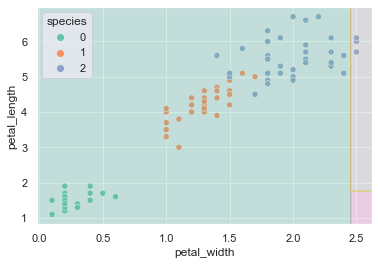

In [46]:
from sklearn.model_selection import train_test_split

iris = pd.read_csv('../DataSets/iris_dataset.csv')
iris = iris.drop("fila", axis=1)
iris = iris.drop("sepal_width", axis=1)
iris = iris.drop("sepal_length", axis=1)
X = iris.drop("species", axis=1)
y = iris.species

# # Modificamos un poco los datos para poder graficar
y = y.map({'setosa': 0,'versicolor': 1, 'virginica': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train,y_train)

# Graficamos los datos y las fronteras creadas
plt.figure()
ax = sns.scatterplot(X_train.petal_width, X_train.petal_length, hue=y, palette='Set2')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

In [47]:
X_train.columns

Index(['petal_length', 'petal_width'], dtype='object')

[Text(0.375, 0.875, 'X[1] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'X[1] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.25, 0.375, 'X[0] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.125, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[0] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

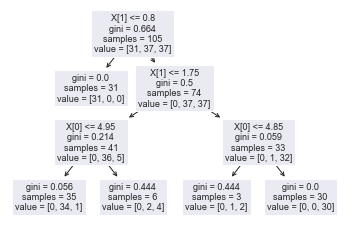

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot

iris = pd.read_csv('../DataSets/iris_dataset.csv')
iris = iris.drop("fila", axis=1)
iris = iris.drop("sepal_width", axis=1)
iris = iris.drop("sepal_length", axis=1)
X = iris.drop("species", axis=1)
y = iris.species

# # Modificamos un poco los datos para poder graficar
y = y.map({'setosa': 0,'versicolor': 1, 'virginica': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth = 3)

tree.plot_tree(clf.fit(X_train,y_train))

**Ejercicio**: explorar algunas características del modelo entrenado.

In [49]:
print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0 1 2]
3
2
[0.07484148 0.92515852]


C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


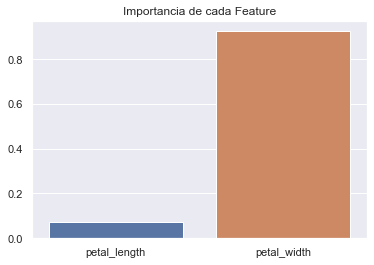

In [50]:
importances = clf.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

**Ejercicio**: predecir con el modelo las etiquetas en el conjunto de Train y de Test. ¿Cómo son las etiquetas?

In [51]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = clf.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = clf.predict(X_test)

**Ejercicio**: evaluar la performance del modelo.

In [52]:
# Comparamos con las etiquetas reales
from sklearn.metrics import accuracy_score

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9619047619047619
Accuracy sobre conjunto de Test: 1.0


**Ejercicio**: ¿Qué ocurre con el desempeño a medida que aumentan `max_depth`? Volver a correr todas las celdas, pero inicializando el `DecisionTreeClassifier` con valores más altos de max_depth.